In [1]:
from numpy.random import seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# class AdalineSGD(object):
#     """ADAptive LInear NEuron classifier.
#     Parameters
#     -----------
#    eta : float

#        Learning rate (between 0.0 and 1.0)

#    n_iter : int

#        Passes over the training dataset.
#     Attributes
#     ----------
#    w_ : 1d-array

#        Weights after fitting.

#    errors_ : list

#        Number of misclassifications in every epoch.

#    shuffle : bool (default: True)

#        Shuffles training data every epoch

#        if True to prevent cycles.

#    random_state : int (default: None)

#        Set random state for shuffling 
#         and initializing the weights.
       
#     """
#     def __init__(self, eta=0.01, n_iter=10,
#                shuffle=True, random_state=None):
#         self.eta = eta
#         self.n_iter = n_iter
#         self.w_initialized = False
#         self.shuffle = shuffle
#         if random_state:
#             seed(random_state)
       
#     def fit(self, X, y):
#         """ Fit training data.
#         Parameters
#         ---------
#        X : {array-like}, shape = [n_samples, n_features]

#            Training vectors, where n_samples

#            is the number of samples and

#            n_features is the number of features.

#        y : array-like, shape = [n_samples]
#             Target values.
#         Returns
#         ------
#        self : object
#          """
#         self._initialize_weights(X.shape[1])
#         self.cost_ = []
#         for i in range(self.n_iter):
#             if self.shuffle:
#                 X, y = self._shuffle(X, y)
#             cost = []
#             for xi, target in zip(X, y):
#                 cost.append(self._update_weights(xi, target))
#             avg_cost = sum(cost)/len(y)
#             self.cost_.append(avg_cost)
#         return self
#     def partial_fit(self, X, y):
#         """Fit training data without reinitializing the weights"""
#         if not self.w_initialized:
#             self._initialize_weights(X.shape[1])
#         if y.ravel().shape[0] > 1:
#             for xi, target in zip(X, y):
#                 self._update_weights(xi, target)
#         else:
#             self._update_weights(X, y)
#         return self
#     def _shuffle(self, X, y):
#           """Shuffle training data"""
#             r = np.random.permutation(len(y))
#     return X[r], y[r]
   
#     def _initialize_weights(self, m):
#         """Initialize weights to zeros"""
#         self.w_ = np.zeros(1 + m)
#         self.w_initialized = True
       
#     def _update_weights(self, xi, target):
#         """Apply Adaline learning rule to update the weights"""
#         output = self.net_input(xi)
#         error = (target - output)
#         self.w_[1:] += self.eta * xi.dot(error)
#         self.w_[0] += self.eta * error
#         cost = 0.5 * error**2
#         return cost
   
#     def net_input(self, X):
#         """Calculate net input"""
#         return np.dot(X, self.w_[1:]) + self.w_[0]
#     def activation(self, X):
#         """Compute linear activation"""
#         return self.net_input(X)
#     def predict(self, X):
#         """Return class label after unit step"""
#         return np.where(self.activation(X) >= 0.0, 1, -1)

In [3]:
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10,shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
       
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    def partial_fit(self, X, y):
        
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    def _shuffle(self, X, y):
          
        r = np.random.permutation(len(y))
        return X[r], y[r]
   
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
       
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
   
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
...   'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
X = df.iloc[0:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [6]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [7]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [8]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(x, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


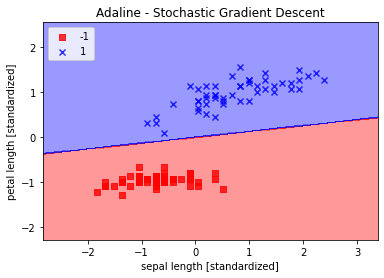

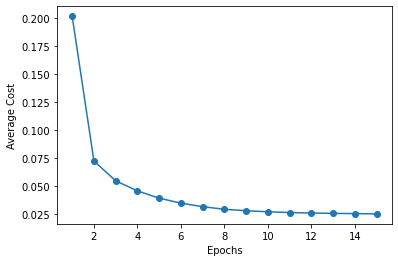

In [9]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

In [15]:
import random
random.seed(None)
random.randint(1,199)

174

In [16]:
x=[1,2,3,4]
x

[1, 2, 3, 4]

In [20]:

random.shuffle(x)
print(x)

[2, 3, 4, 1]


In [26]:
a=None
if a:
    print('y')